In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data extracted from your provided metrics
# Each sublist contains average_precision, precision, recall, and f1 for a query
lsa_metrices = [
    [0.9978, 0.9773, 0.4624, 0.6277],
    [1.0,    1.0,    0.0043, 0.0086],
    [0.9831, 0.9394, 0.008,  0.0158],
    [1.0,    1.0,    0.0877, 0.1613],
    [0.9801, 0.9118, 0.5,    0.6458],
    [1.0,    1.0,    0.0345, 0.0667],
    [0.949,  0.9286, 0.0351, 0.0677],
    [0.9568, 0.8125, 0.0199, 0.0389],
    [0.9778, 0.8824, 0.1364, 0.2362],
    [0.0,    0.0,    0.0,    0.0],
    [0.5401, 0.0583, 1.0,    0.1101],
    [1.0,    1.0,    0.003,  0.0061],
    [0.8394, 0.7917, 0.0069, 0.0138],
    [1.0,    1.0,    0.0047, 0.0093]
]

lda_metrics = [
    [0.551, 0.375, 0.1613, 0.2256],
    [0.7202, 0.6515, 0.0074, 0.0147],
    [0.8604, 0.8524, 0.0133, 0.0263],
    [0.0839, 0.0455, 0.0351, 0.0396],
    [0.0833, 0.02, 0.0161, 0.0179],
    [0.333, 0.0556, 0.0345, 0.0426],
    [0.2262, 0.2857, 0.0027, 0.0054],
    [0.8818, 0.8148, 0.0337, 0.0647],
    [0.5623, 0.339, 0.1818, 0.2367],
    [0, 0, 0, 0],
    [0.1119, 0.0286, 0.5, 0.0541],
    [0.4562, 0.5429, 0.0091, 0.018],
    [0.5878, 0.3913, 0.0033, 0.0065],
    [0.1665, 0.1957, 0.0084, 0.0162]
]

sbert_metrics = [
    [1, 1, 0.0238, 0.0465],
    [1, 1, 0.0001, 0.0003],
    [1, 0.8, 0.0007, 0.0013],
    [1, 1, 0.0013, 0.0026],
    [1, 1, 0.0073, 0.0144],
    [1, 1, 0.0145, 0.0286],
    [1, 1, 0.0006, 0.0013],
    [1, 1, 0.0011, 0.0021],
    [1, 1, 0.0003, 0.0006],
    [1, 1, 0.0043, 0.0085],
    [1, 1, 0.0011, 0.0021],
    [1, 1, 0.0001, 0.0003],
    [1, 1, 0.0001, 0.0002],
    [1, 1, 0.0013, 0.0025]
]


# Transpose the list to separate the metrics
lsa_array = np.array(lsa_metrices)
lda_array = np.array(lda_metrics)
sbert_array = np.array(sbert_metrics)


In [5]:
def box_plots(metrics_array, model):
  # get the values
  average_precision, precision, recall, f1 = metrics_array.T

  # Box plots for each metric
  fig, axs = plt.subplots(2, 2, figsize=(10, 5))
  fig.suptitle(f'{model} Model Performance Metrics Distribution')

  # Average Precision
  sns.boxplot(ax=axs[0, 0], y=average_precision)
  axs[0, 0].set_title('Average Precision')

  # Precision
  sns.boxplot(ax=axs[0, 1], y=precision)
  axs[0, 1].set_title('Precision')

  # Recall
  sns.boxplot(ax=axs[1, 0], y=recall)
  axs[1, 0].set_title('Recall')

  # F1 Score
  sns.boxplot(ax=axs[1, 1], y=f1)
  axs[1, 1].set_title('F1 Score')

  # Adjust layout
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])

  # Show the plots
  plt.show()


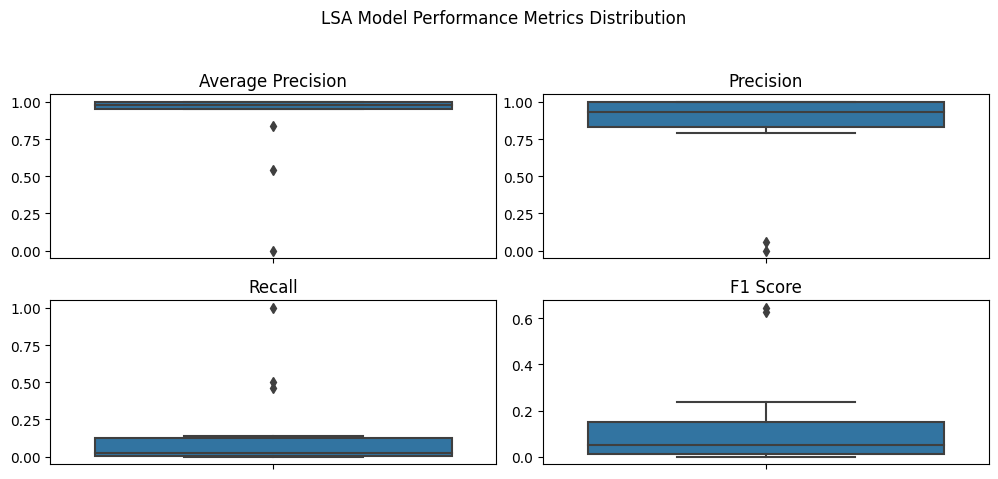

In [6]:
box_plots(lsa_array, model = 'LSA')

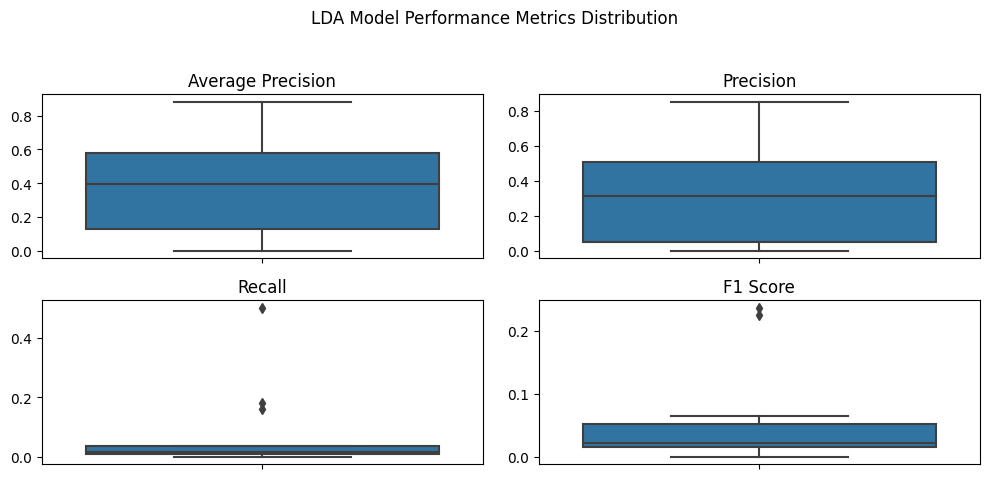

In [7]:
box_plots(lda_array, model = 'LDA')

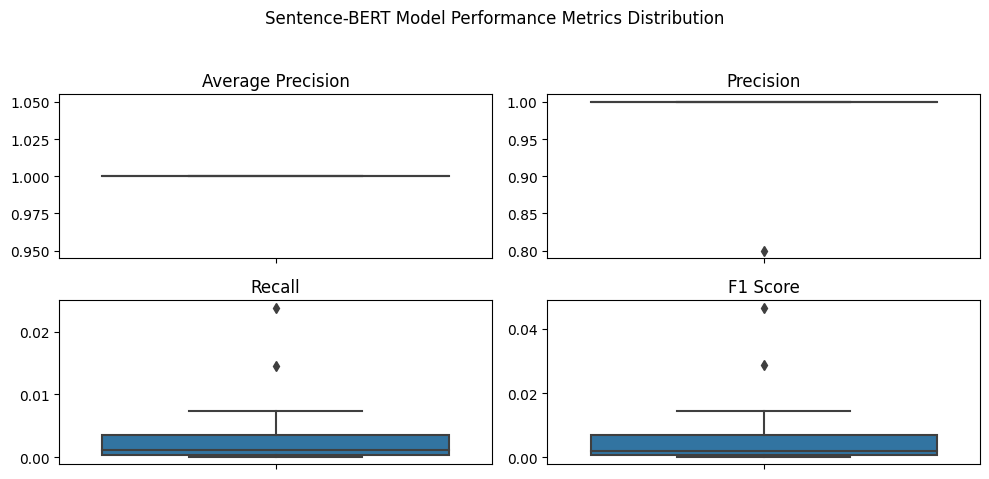

In [8]:
box_plots(sbert_array, model = 'Sentence-BERT')

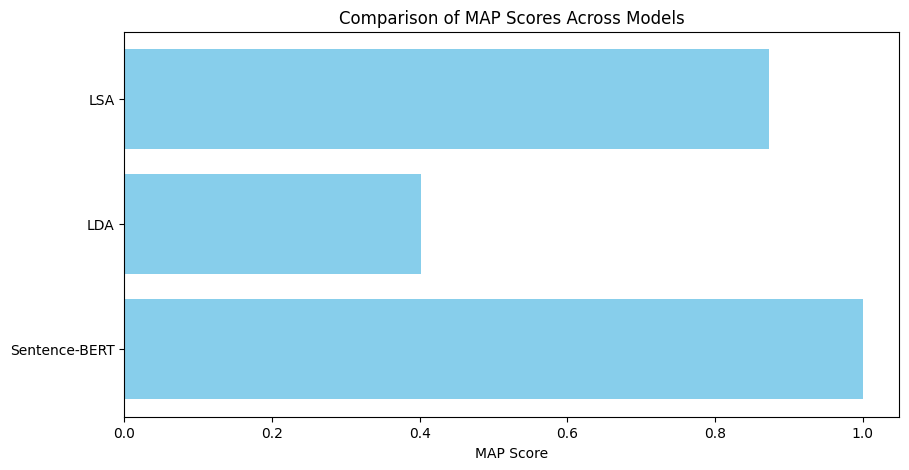

In [10]:
def map_chart(lsa_array, lda_array, bert_array):
  map_scores = {
      'LSA': sum(lsa_array[:,0])/len(lsa_array[:,0]),
      'LDA': sum(lda_array[:,0])/len(lda_array[:,0]),
      'Sentence-BERT': sum(bert_array[:,0])/len(bert_array[:,0])
  }
  # Create lists of model names and their corresponding MAP scores
  models = list(map_scores.keys())
  map_values = list(map_scores.values())

  # Plotting the horizontal bar chart
  plt.figure(figsize=(10, 5))
  plt.barh(models, map_values, color='skyblue')
  plt.xlabel('MAP Score')
  plt.title('Comparison of MAP Scores Across Models')
  plt.gca().invert_yaxis()  # To display the highest score at the top
  plt.show()

map_chart(lsa_array, lda_array, sbert_array)